First things first, let's import the libraries we'll be working with.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import scipy.stats as stats

Let's first read our oec.csv file and take a look at what we've got !

In [2]:
oec = pd.read_csv('oec.csv')
oec

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.21960,0.0370,270.60,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.3620,-0.310,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.41230,0.0500,190.00,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.3620,-0.310,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.05400,0.176891,0.00480,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.4500,0.000,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.11400,4.194525,0.03900,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.4500,0.000,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.07100,6.356006,0.05200,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.4500,0.000,3584.0,NaN,Controversial
5,Kepler-9 b,0,0.2500,0.84000,19.224180,0.14300,0.0626,NaN,NaN,NaN,...,15/12/03,19 02 17,+38 24 03,650.000,1.070,1.0200,0.120,5777.0,NaN,Confirmed planets
6,Kepler-9 c,0,0.1700,0.82000,39.031060,0.22900,0.0684,NaN,NaN,NaN,...,15/12/03,19 02 17,+38 24 03,650.000,1.070,1.0200,0.120,5777.0,NaN,Confirmed planets
7,Kepler-9 d,0,0.0220,0.14700,1.592851,0.02710,NaN,NaN,NaN,NaN,...,14/03/10,19 02 17,+38 24 03,650.000,1.070,1.0200,0.120,5777.0,NaN,Confirmed planets
8,GJ 160.2 b,0,0.0321,NaN,5.235400,0.05300,0.0600,350.00,NaN,NaN,...,15/04/21,04 06 34.84136,-20 51 11.2391,43.250,0.690,NaN,NaN,4347.0,NaN,Controversial
9,Kepler-566 b,0,NaN,0.19200,18.427946,NaN,NaN,NaN,NaN,NaN,...,16/05/10,19 26 13,+47 48 52,NaN,0.830,0.7900,-0.010,5132.0,NaN,Confirmed planets


Let's take a look at the columns in the dataframe

In [3]:
oec.columns

Index(['PlanetIdentifier', 'TypeFlag', 'PlanetaryMassJpt', 'RadiusJpt',
       'PeriodDays', 'SemiMajorAxisAU', 'Eccentricity', 'PeriastronDeg',
       'LongitudeDeg', 'AscendingNodeDeg', 'InclinationDeg', 'SurfaceTempK',
       'AgeGyr', 'DiscoveryMethod', 'DiscoveryYear', 'LastUpdated',
       'RightAscension', 'Declination', 'DistFromSunParsec',
       'HostStarMassSlrMass', 'HostStarRadiusSlrRad', 'HostStarMetallicity',
       'HostStarTempK', 'HostStarAgeGyr', 'ListsPlanetIsOn'],
      dtype='object')

Let's make a dataframe of all the columns we're interested in, that is, 'PlanetIdentifier', so that we can see which exoplanet it is, 'SurfaceTempK', so that we can see the surface temperature of the exoplanet, 'PlanetaryMassJpt', which is the mass relative to Jupiter and 'ListsPlanetIsOn', to see in which group the exoplanet is categorized. I've also added the distance in Parsec and the orbital period. Let's also instantiate it to x.

In [4]:
x = oec[['PlanetIdentifier','SurfaceTempK','PlanetaryMassJpt','DistFromSunParsec','PeriodDays','ListsPlanetIsOn',]].dropna()

Our new data frame with the columns of interest

In [5]:
x

,PlanetIdentifier,SurfaceTempK,PlanetaryMassJpt,DistFromSunParsec,PeriodDays,ListsPlanetIsOn
5,Kepler-9 b,707.2,0.25000,650.00,19.224180,Confirmed planets
6,Kepler-9 c,557.9,0.17000,650.00,39.031060,Confirmed planets
7,Kepler-9 d,1601.5,0.02200,650.00,1.592851,Confirmed planets
10,WASP-124 b,1400.0,0.60000,433.00,3.372650,Confirmed planets
15,WASP-82 b,2190.0,1.24000,200.00,2.705782,Confirmed planets
16,Gliese 1214 b,604.0,0.01950,14.55,1.580404,Confirmed planets
19,HD 4203 b,263.9,1.82000,77.82,437.050000,Confirmed planets
21,HD 179079 b,925.0,0.08000,63.69,14.476000,Confirmed planets
35,CoRoT-24 c,850.0,0.08800,600.00,11.759000,Confirmed planets
51,WASP-108 b,1590.0,0.89200,220.00,2.675546,Confirmed planets


# Surface temperature and Planetary Mass relation

## Complete data set

Our main focus though will be on 'SurfaceTempK' and 'PlanetaryMassJpt'.  

Means and Medians

In [108]:
print (oec.SurfaceTempK.mean(),oec.SurfaceTempK.median())
print (oec.PlanetaryMassJpt.mean(),oec.PlanetaryMassJpt.median())


871.7141700404858 719.6
2.8909441470985464 0.94


Both of those variables got a correlation coefficient of 0.11 (11%). 

In [6]:
oec.SurfaceTempK.corr(oec.PlanetaryMassJpt)

0.11082870219115644

Complete data set plot 

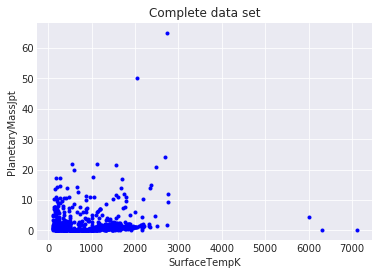

In [120]:
with sns.axes_style(style="darkgrid"):
    plt.title('Complete data set')
    plt.xlabel('SurfaceTempK')
    plt.ylabel('PlanetaryMassJpt')
    plt.plot(oec.SurfaceTempK,oec.PlanetaryMassJpt,'b.')
    plt.figure(9)


plt.show()

Data distribution

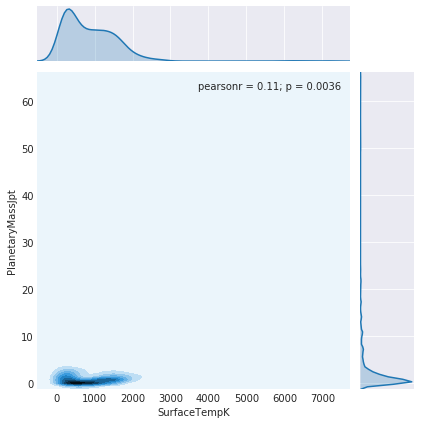

In [60]:
with sns.axes_style('darkgrid'):
    sns.jointplot('SurfaceTempK','PlanetaryMassJpt',data=oec,kind='kde',size=6)

plt.show()

Linear regression fit 

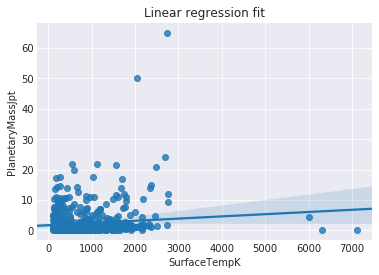

In [121]:
with sns.axes_style(style="darkgrid"):

    plt.title('Linear regression fit')
    sns.regplot('SurfaceTempK','PlanetaryMassJpt',oec)
    plt.show()

## Cleaned data set SurfaceTempK(0-2000), PlanetaryMassJpt(0-10)

Let's take out the outliers at the extremes by containing the surface temperature (0 to 2000) and planetary mass (0 to 10).

So we'll eliminate exoplanets having a surface temperature greater than 2000K and a planetary mass greater than 10 Mjpt

Means and Medians

In [113]:
print (oec_cleaned.SurfaceTempK.mean(),oec_cleaned.SurfaceTempK.median())
print (oec_cleaned.PlanetaryMassJpt.mean(),oec_cleaned.PlanetaryMassJpt.median())


794.0395833333329 704.35
1.4985862849266325 0.819


We get a correlation coefficient of -0.09 (-9 %).

In [114]:
oec_cleaned = oec.where(oec.SurfaceTempK < 2000).where(oec.PlanetaryMassJpt < 10)

oec_cleaned.SurfaceTempK.corr(oec_cleaned.PlanetaryMassJpt)


-0.097335141391822144

If we plot the 'cleaned' dataset we get something that looks like this.

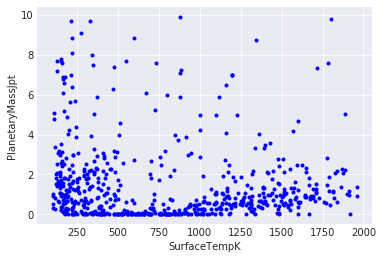

In [122]:
with sns.axes_style(style="darkgrid"):


    plt.plot(oec_cleaned.SurfaceTempK,oec_cleaned.PlanetaryMassJpt,'b.')
    plt.xlabel('SurfaceTempK')
    plt.ylabel('PlanetaryMassJpt')
    plt.show()

Data distribution

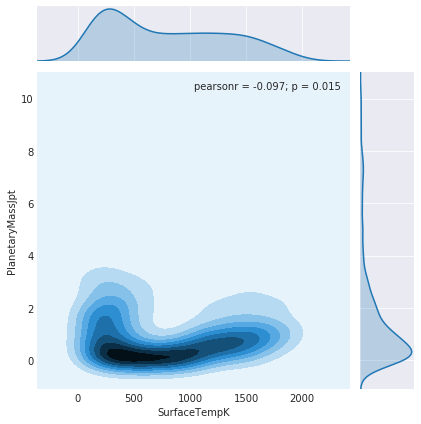

In [132]:
with sns.axes_style('darkgrid'):
    sns.jointplot('SurfaceTempK','PlanetaryMassJpt',data=oec_cleaned,kind='kde',size=6)

plt.show()

Linear regression fit 

We get a negative relation

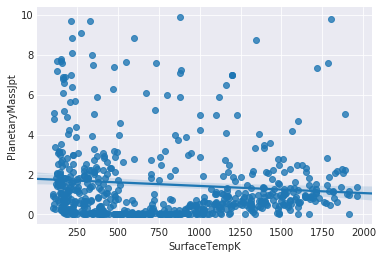

In [124]:
with sns.axes_style(style="darkgrid"):


    sns.regplot('SurfaceTempK','PlanetaryMassJpt',oec_cleaned)
    plt.show()

## Cleaned data set SurfaceTempK(0-2000), PlanetaryMassJpt(0-2)

Finally, let's exclude all the exoplanets having a mass greater than 2 Mjpt


Means and Medians

In [106]:
print (oec_cleaned_2.SurfaceTempK.mean(),oec_cleaned_2.SurfaceTempK.median())
print (oec_cleaned_2.PlanetaryMassJpt.mean(),oec_cleaned_2.PlanetaryMassJpt.median())


826.0265957446803 772.45
0.6158948804132295 0.525


We get a correlation of 0.07

In [12]:
oec_cleaned_2 = oec.where(oec.SurfaceTempK < 2000).where(oec.PlanetaryMassJpt < 2)

oec_cleaned_2.SurfaceTempK.corr(oec_cleaned_2.PlanetaryMassJpt)

0.073198670994875314

If we plot it it gives us something that looks like this

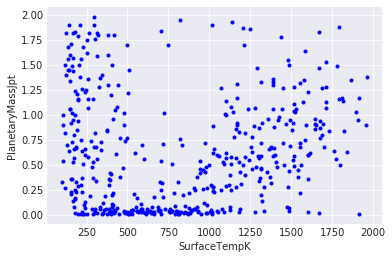

In [125]:
with sns.axes_style(style="darkgrid"):


    plt.plot(oec_cleaned_2.SurfaceTempK,oec_cleaned_2.PlanetaryMassJpt,'b.')
    plt.xlabel('SurfaceTempK')
    plt.ylabel('PlanetaryMassJpt')
    plt.show()

Data distribution

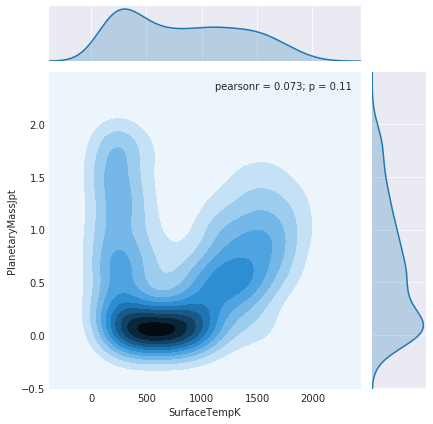

In [63]:
with sns.axes_style('darkgrid'):
    sns.jointplot('SurfaceTempK','PlanetaryMassJpt',data=oec_cleaned_2,kind='kde',size=6)

plt.show()

Linear regression fit 

A linear regression fit gives us a slight positive relation

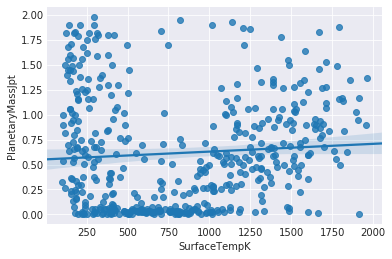

In [126]:
with sns.axes_style(style="darkgrid"):

    sns.regplot('SurfaceTempK','PlanetaryMassJpt',oec_cleaned_2)
    plt.xlabel('SurfaceTempK')
    plt.ylabel('PlanetaryMassJpt')
    plt.show()

# Data of interest

Let's get only the exoplanets having a surface temperature between 192K and 320K and a planetary mass between
0.000337995(Mars) and 0.1 which would be habitable in terms of temperature and mass

In [19]:
IdealTemperature = (x.SurfaceTempK > 192) == (x.SurfaceTempK < 320)
IdealMass = (x.PlanetaryMassJpt > 0.000337995) == (x.PlanetaryMassJpt < 0.1)

Now let's apply those conditions on our data frame

In [20]:
X = x.where(IdealTemperature).where(IdealMass).dropna()

Our new data frame looks like that

In [21]:
X

,PlanetIdentifier,SurfaceTempK,PlanetaryMassJpt,DistFromSunParsec,PeriodDays,ListsPlanetIsOn
610,HD 69830 d,282.9,0.058000,12.600,197.000000,Confirmed planets
967,HD 40307 g,224.0,0.022334,12.800,197.800000,Confirmed planets
1053,Gliese 163 c,302.0,0.021391,15.000,25.630580,Confirmed planets
1322,HD 10180 g,239.0,0.069205,39.400,596.000000,Confirmed planets
1676,HD 38858 b,237.2,0.096100,15.200,407.150000,Retracted planet candidate
1971,Proxima Centauri b,234.0,0.004089,1.295,11.186000,"Confirmed planets, Planets in binary systems, ..."
2077,HD 31527 d,299.2,0.051900,38.600,274.490000,Confirmed planets
2568,TRAPPIST-1 d,288.0,0.001290,12.100,4.049610,Confirmed planets
2569,TRAPPIST-1 e,251.3,0.001950,12.100,6.099615,Confirmed planets
2570,TRAPPIST-1 f,219.0,0.002139,12.100,9.206690,Confirmed planets


Data frame of Earth's variables 
(Note: that 'DistFromSunParsec' is the distance measurement between our Sun and other stars, which isn't relevant for Earth)

In [22]:
Earth = pd.DataFrame({
    'PlanetIdentifier':['Earth'],
    'SurfaceTempK':[289.15],
    'PlanetaryMassJpt':[0.0031457],
    'HostStarTempK':[5778],
    'HostStarMassSlrMass':[1],
    'PeriodDays':[365.26],
    'ListsPlanetIsOn':['Confirmed planets']
},columns=['PlanetIdentifier','SurfaceTempK','PlanetaryMassJpt','DistFromSunParsec','PeriodDays','ListsPlanetIsOn'],index=[1])
Earth

,PlanetIdentifier,SurfaceTempK,PlanetaryMassJpt,DistFromSunParsec,PeriodDays,ListsPlanetIsOn
1,Earth,289.15,0.003146,NaN,365.26,Confirmed planets


Concatenating both 'Earth' and 'X' data frame

In [23]:
X_Final = pd.concat([Earth,X])

Which gives us

In [24]:
X_Final

,PlanetIdentifier,SurfaceTempK,PlanetaryMassJpt,DistFromSunParsec,PeriodDays,ListsPlanetIsOn
1,Earth,289.15,0.003146,NaN,365.260000,Confirmed planets
610,HD 69830 d,282.90,0.058000,12.6,197.000000,Confirmed planets
967,HD 40307 g,224.00,0.022334,12.8,197.800000,Confirmed planets
1053,Gliese 163 c,302.00,0.021391,15,25.630580,Confirmed planets
1322,HD 10180 g,239.00,0.069205,39.4,596.000000,Confirmed planets
1676,HD 38858 b,237.20,0.096100,15.2,407.150000,Retracted planet candidate
1971,Proxima Centauri b,234.00,0.004089,1.295,11.186000,"Confirmed planets, Planets in binary systems, ..."
2077,HD 31527 d,299.20,0.051900,38.6,274.490000,Confirmed planets
2568,TRAPPIST-1 d,288.00,0.001290,12.1,4.049610,Confirmed planets
2569,TRAPPIST-1 e,251.30,0.001950,12.1,6.099615,Confirmed planets


Planets plots with surface temperature(Kelvin) at the X-axis and planetary mass(Mjpt) at the Y-axis

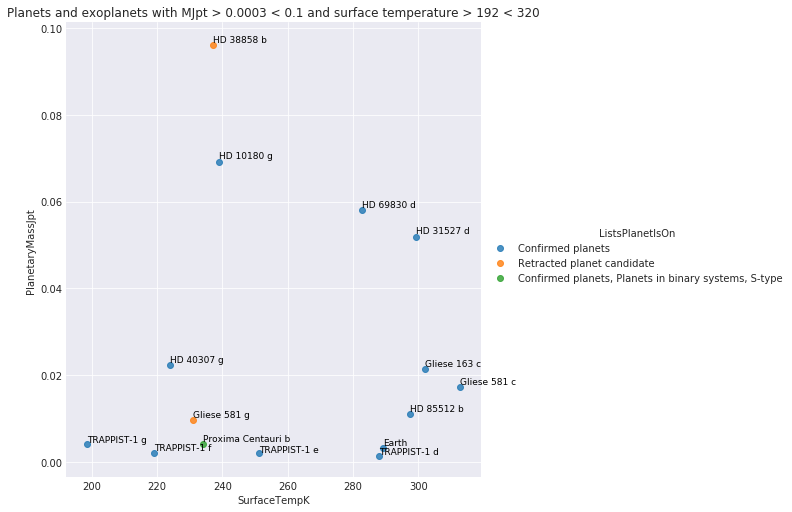

In [130]:

with sns.axes_style('darkgrid'):
    sns.lmplot(x='SurfaceTempK',y='PlanetaryMassJpt',data=X_Final,fit_reg=False,size=7,hue='ListsPlanetIsOn',)
    plt.title('Planets and exoplanets with MJpt > 0.0003 < 0.1 and surface temperature > 192 < 320')

plt.annotate(xy=(289.15,0.00390),s='Earth',size=9)
plt.annotate(xy=(234.00,0.0047900),s='Proxima Centauri b',size=9)
plt.annotate(xy=(288.0,0.001680),s='TRAPPIST-1 d',size=9)
plt.annotate(xy=(251.3,0.002300),s='TRAPPIST-1 e',size=9)
plt.annotate(xy=(219.0,0.002699),s='TRAPPIST-1 f',size=9)
plt.annotate(xy=(198.60,0.004595),s='TRAPPIST-1 g',size=9)
plt.annotate(xy=(230.90,0.010300),s='Gliese 581 g',size=9)
plt.annotate(xy=(312.70,0.017901),s='Gliese 581 c',size=9)
plt.annotate(xy=(297.40,0.011700),s='HD 85512 b',size=9)
plt.annotate(xy=(282.90,0.058700),s='HD 69830 d',size=9)
plt.annotate(xy=(224.00,0.022999),s='HD 40307 g',size=9)
plt.annotate(xy=(239.00,0.069990),s='HD 10180 g',size=9)
plt.annotate(xy=(237.20,0.096700),s='HD 38858 b',size=9)
plt.annotate(xy=(299.20,0.052700),s='HD 31527 d',size=9)
plt.annotate(xy=(302.00,0.021991),s='Gliese 163 c',size=9)



plt.show()

Planets Pairplots

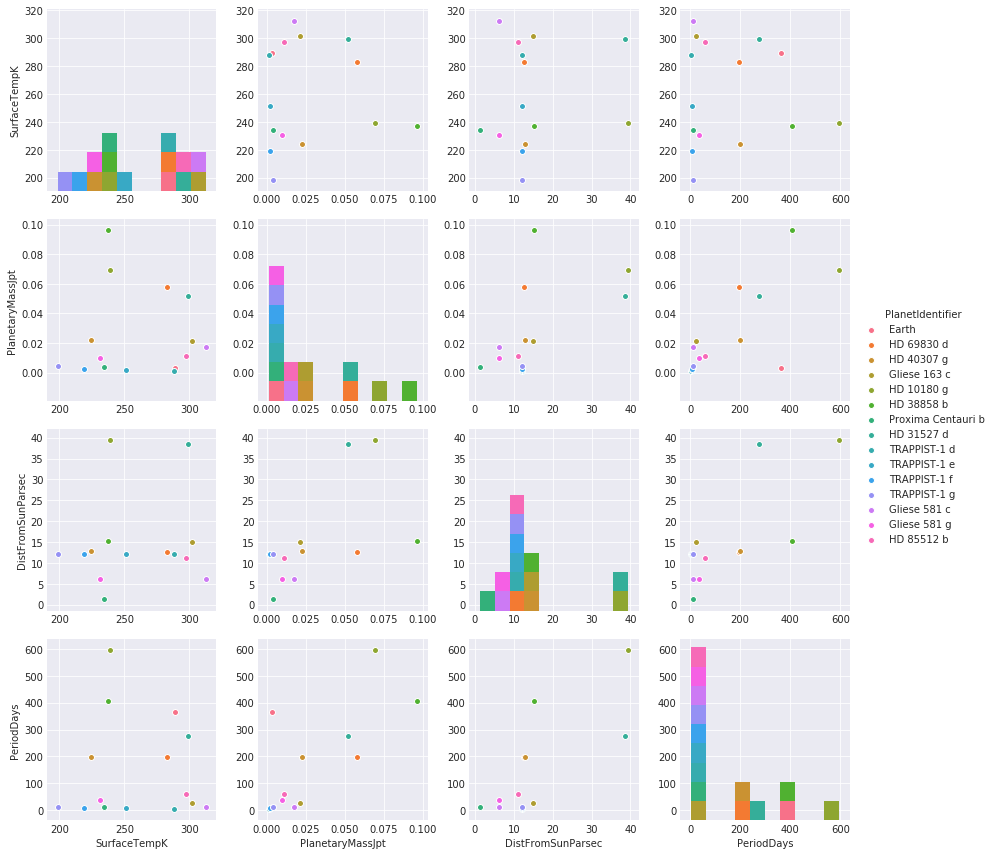

In [26]:
with sns.axes_style(style='darkgrid'):
    sns.pairplot(data=X_Final,hue='PlanetIdentifier',size=3)
    sns.set_style('ticks')

plt.show()

# TRAPPIST-1 SYSTEM

We got 4 planets from the TRAPPIST-1 system, d e f and g

In [27]:
trappist = X_Final.loc[[1,2568,2569,2570,2571]]

Data frame of TRAPPIST-1 exoplanets and Earth

In [28]:
trappist

,PlanetIdentifier,SurfaceTempK,PlanetaryMassJpt,DistFromSunParsec,PeriodDays,ListsPlanetIsOn
1,Earth,289.15,0.003146,NaN,365.260000,Confirmed planets
2568,TRAPPIST-1 d,288.00,0.001290,12.1,4.049610,Confirmed planets
2569,TRAPPIST-1 e,251.30,0.001950,12.1,6.099615,Confirmed planets
2570,TRAPPIST-1 f,219.00,0.002139,12.1,9.206690,Confirmed planets
2571,TRAPPIST-1 g,198.60,0.004215,12.1,12.352940,Confirmed planets


Plots of TRAPPIST-1 exoplanets and Earth

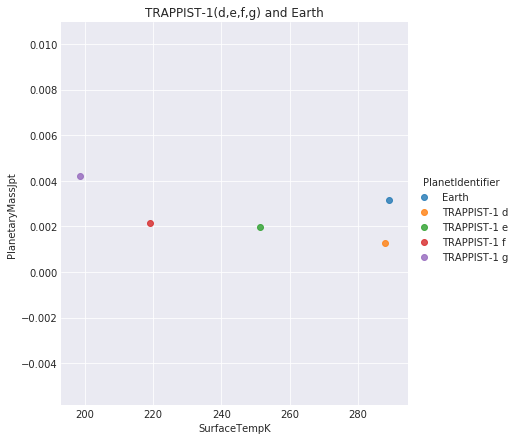

In [128]:
with sns.axes_style('darkgrid'):
    sns.lmplot(x='SurfaceTempK',y='PlanetaryMassJpt',data=trappist,fit_reg=False,hue='PlanetIdentifier',size=6)
    plt.title('TRAPPIST-1(d,e,f,g) and Earth')
    plt.show()

Earth and TRAPPIST-1 d,e,f and g correlation

In [30]:
trappist.pivot_table(columns='PlanetIdentifier').corr()

PlanetIdentifier,Earth,TRAPPIST-1 d,TRAPPIST-1 e,TRAPPIST-1 f,TRAPPIST-1 g
PlanetIdentifier,,,,,
Earth,1.000000,0.330726,0.339215,0.354124,0.371231
TRAPPIST-1 d,0.330726,1.000000,0.999959,0.999690,0.999064
TRAPPIST-1 e,0.339215,0.999959,1.000000,0.999874,0.999413
TRAPPIST-1 f,0.354124,0.999690,0.999874,1.000000,0.999832
TRAPPIST-1 g,0.371231,0.999064,0.999413,0.999832,1.000000


# PROXIMA CENTAURI SYSTEM

Let's get Proxima Centauri b and Earth from our data frame and instantiate it to 'proxima'

In [31]:
proxima = X_Final.iloc[[0,6]]

Data frame of Proxima Centauri b and Earth

In [32]:
proxima

,PlanetIdentifier,SurfaceTempK,PlanetaryMassJpt,DistFromSunParsec,PeriodDays,ListsPlanetIsOn
1,Earth,289.15,0.003146,NaN,365.260,Confirmed planets
1971,Proxima Centauri b,234.00,0.004089,1.295,11.186,"Confirmed planets, Planets in binary systems, ..."


Proxima Centari b and Earth plots

In [1]:
with sns.axes_style('darkgrid'):
    sns.lmplot(x='SurfaceTempK',y='PlanetaryMassJpt',data=proxima,fit_reg=False,size=6,hue='PlanetIdentifier',)
    plt.title('Proxima Centauri b and Earth')

plt.show()

NameError: name 'sns' is not defined

Earth and Proxima Centauri b correlation score of 0.35

In [34]:
proxima.pivot_table(columns='PlanetIdentifier').corr()

PlanetIdentifier,Earth,Proxima Centauri b
PlanetIdentifier,,
Earth,1.000000,0.358991
Proxima Centauri b,0.358991,1.000000
